In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

In [2]:
#read in raw data (replace ... with your own file directory where the data was saved)
df_VA = pd.read_csv('df_VA_csv.csv')


In [3]:
df_VA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      116 non-null    int64  
 1   period_begin                    116 non-null    object 
 2   period_end                      116 non-null    object 
 3   period_duration                 116 non-null    int64  
 4   region_type                     116 non-null    object 
 5   region_type_id                  116 non-null    int64  
 6   table_id                        116 non-null    int64  
 7   is_seasonally_adjusted          116 non-null    object 
 8   region                          116 non-null    object 
 9   city                            116 non-null    object 
 10  state                           116 non-null    object 
 11  state_code                      116 non-null    object 
 12  property_type                   116 

In [10]:
#Select fields that are of interest
fields=[
'region',
'median_sale_price_yoy',
'homes_sold_yoy',
'new_listings_yoy',
'median_dom',
'avg_sale_to_list',
]

df=df_VA[fields].set_index('region')
df.head()

,median_sale_price_yoy,homes_sold_yoy,new_listings_yoy,median_dom,avg_sale_to_list
region,,,,,
"Richmond, VA - Midlothian",0.127962,0.479167,0.346154,11.5,1.031888
"Norfolk, VA - Colonial Place",0.030312,0.562500,0.000000,15.0,1.020612
"Norfolk, VA - Snug Harbor",0.162325,0.045455,-0.344828,15.5,1.022802
"Hampton, VA - Wythe",0.024964,-0.090909,0.112245,24.0,1.007801
"Poquoson, VA - Central Poquoson",0.045333,0.217391,-0.200000,23.0,1.006531


In [11]:
df.describe()

,median_sale_price_yoy,homes_sold_yoy,new_listings_yoy,median_dom,avg_sale_to_list
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,0.121002,0.110827,0.177796,17.245690,1.017765
std,0.091577,0.313118,0.358796,6.416181,0.014437
min,-0.169541,-0.435897,-0.384615,5.000000,0.976540
25%,0.077049,-0.114532,-0.058915,13.750000,1.009362
50%,0.134490,0.048256,0.114093,17.500000,1.017640
75%,0.172408,0.260900,0.310429,21.000000,1.024749
max,0.313596,1.500000,1.909091,35.500000,1.065411


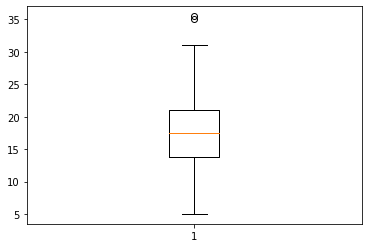

In [12]:
fig, ax = plt.subplots()
ax.boxplot(df['median_dom'])
plt.show()

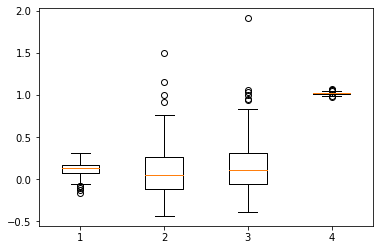

In [13]:
fig, ax = plt.subplots()
ax.boxplot(df[['median_sale_price_yoy','homes_sold_yoy','new_listings_yoy', 'avg_sale_to_list']])
plt.show()

In [14]:
percentiles = df['median_dom'].quantile([0.00,0.98]).values 
print('median_dom ',percentiles[1])
df['median_dom'] = np.where(df['median_dom'] >= 34,percentiles[1],df['median_dom'])

percentiles = df['new_listings_yoy'].quantile([0.00,0.99]).values
print('new_listings_yoy ',percentiles)
df['new_listings_yoy'] = np.where(df['new_listings_yoy'] >= 1.0,percentiles[1],df['new_listings_yoy'])

percentiles = df['homes_sold_yoy'].quantile([0.00,0.99]).values 
print('homes_sold_yoy ',percentiles)
df['homes_sold_yoy'] = np.where(df['homes_sold_yoy'] >= 1.3,percentiles[1],df['homes_sold_yoy'])

median_dom  30.85
new_listings_yoy  [-0.38461538  1.05163399]
homes_sold_yoy  [-0.43589744  1.13076923]


In [15]:
df.describe()

,median_sale_price_yoy,homes_sold_yoy,new_listings_yoy,median_dom,avg_sale_to_list
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,0.121002,0.107644,0.171007,17.169828,1.017765
std,0.091577,0.300496,0.332113,6.224286,0.014437
min,-0.169541,-0.435897,-0.384615,5.000000,0.976540
25%,0.077049,-0.114532,-0.058915,13.750000,1.009362
50%,0.134490,0.048256,0.114093,17.500000,1.017640
75%,0.172408,0.260900,0.310429,21.000000,1.024749
max,0.313596,1.153846,1.051634,31.000000,1.065411


In [16]:
#Scale all the features using min-max scaler
minmax_scaler=MinMaxScaler()
scaled_features=minmax_scaler.fit_transform(df)

array([0.3472835 , 0.29682516, 0.15622105, 0.13704327, 0.06262702])

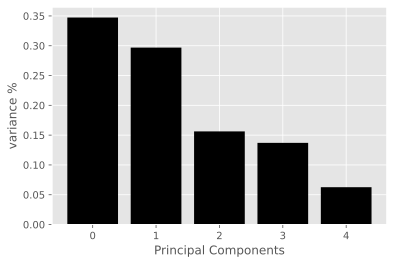

In [17]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Create a PCA instance
pca=PCA(n_components=5)
principalComponents=pca.fit_transform(scaled_features)
#Plot the expained variaces
features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color='black')
plt.xlabel("Principal Components")
plt.ylabel('variance %')
plt.xticks(features)

#Save components to a dataframe
PCA_components=pd.DataFrame(principalComponents)

#Show the expained variance by each principal component
pca.explained_variance_ratio_

In [21]:
weights = pca.components_
print(weights)

print(df.columns)

[[-0.24972174 -0.2353041  -0.21076249  0.8075405  -0.43096235]
 [ 0.28757522  0.35059232  0.81564581  0.29286739 -0.20817331]
 [ 0.69435752  0.43925896 -0.50436166  0.25344766  0.07939017]
 [-0.60427684  0.7850228  -0.12492215  0.03264354  0.04379004]
 [ 0.08750249  0.11183819 -0.1425302  -0.4436279  -0.87333554]]
Index(['median_sale_price_yoy', 'homes_sold_yoy', 'new_listings_yoy',
       'median_dom', 'avg_sale_to_list'],
      dtype='object')


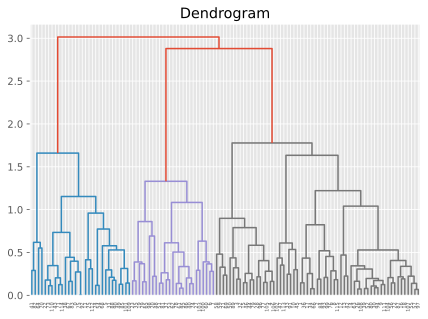

In [22]:

#Create a dendrogram using hierarchical clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(7, 5))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(PCA_components, method='ward'))

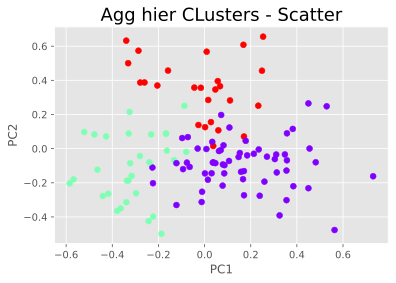

In [24]:
#plot scatter plot
agc = AgglomerativeClustering(n_clusters =3)
plt.figure(figsize=(6, 4))
plt. scatter(PCA_components[0],PCA_components[1], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt. title ('Agg hier CLusters - Scatter', fontsize = 18)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

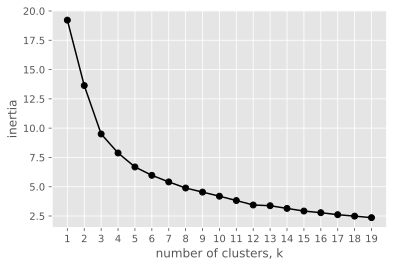

In [25]:

#Elbow method
ks=range(1,20)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:3]) #we only use the first 3 principal components
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias, '-o',color='black')    
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

/tmp/ipykernel_3610/1004068204.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


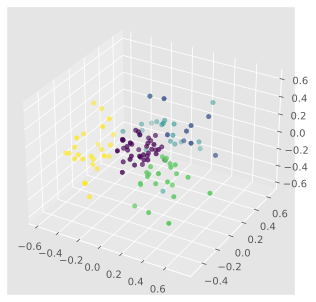

In [26]:
#plot 3-D scatter plot
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=42)
kmeans.fit(PCA_components.iloc[:,:3])
labels=kmeans.predict(PCA_components.iloc[:,:3])

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(PCA_components[0],PCA_components[1],PCA_components[2],c=labels)
pyplot.show()

In [27]:
#Add cluster labels to the original dataset and export to csv file
df_VA['cluster_nbr']=kmeans.labels_
df_VA_clusters=pd.concat([df_VA.reset_index(drop=True),pd.DataFrame(principalComponents)],axis=1)
df_VA_clusters.to_csv('df_VA2.csv')

In [30]:
df_VA.tail()

,Unnamed: 0,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,...,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,cluster_nbr
111,8455086,2021-07-01,2021-09-30,90,neighborhood,1,347907,f,"Chesapeake, VA - Great Bridge",Chesapeake,...,NaN,NaN,NaN,0.352941,-0.147059,0.082671,"Virginia Beach, VA",47260,2022-01-09 14:29:56,0
112,8456653,2021-07-01,2021-09-30,90,neighborhood,1,764352,f,"Tuckahoe, VA - Midlothian",Tuckahoe,...,NaN,NaN,NaN,0.640625,0.038215,-0.102232,"Richmond, VA",40060,2022-01-09 14:29:56,4
113,8528944,2021-07-01,2021-09-30,90,neighborhood,1,58830,f,"Portsmouth, VA - Prentis Park",Portsmouth,...,NaN,NaN,NaN,0.272727,-0.127273,-0.560606,"Virginia Beach, VA",47260,2022-01-09 14:29:56,1
114,8749935,2021-07-01,2021-09-30,90,neighborhood,1,179029,f,"Richmond, VA - East End",Richmond,...,NaN,NaN,NaN,0.463415,0.003955,0.011802,"Richmond, VA",40060,2022-01-09 14:29:56,4
115,8773495,2021-07-01,2021-09-30,90,neighborhood,1,59056,f,"Norfolk, VA - South Bayview",Norfolk,...,NaN,NaN,NaN,0.200000,-0.133333,-0.300000,"Virginia Beach, VA",47260,2022-01-09 14:29:56,0
